# <center><font color='MediumSeaGreen'> _Módulo SQL G45_</font>
# <center><font color='MediumSeaGreen'> Examen final de PSQL </font>
## <center> _Prueba - SQL para Data Science_ 

<center><b> Bárbara Pérez</b><center>

________________

## <font color='MediumSeaGreen'>Descripción del problema</font> 


Desde **OkCupid** -aplicación de citas- solicitan el desarrollo de una serie de modelos predictivos.

Los datos a utilizar se registraron en base a una serie de perfiles públicos dentro de 25 millas de la ciudad de San Francisco activos durante el 2011.

***Caveat:*** *Los permisos para obtener estos datos provinieron del presidente y co-fundador de OkCupid, Christian Rudder, con la condición de que se mantuvieran públicos.*

________

## <font color='MediumSeaGreen'>Archivos</font> 

La evaluación considera los siguientes documentos:
* Un archivo de funciones auxiliares con todas las funciones implementadas.
* Un notebook con el procedimiento implementado.
* Un <span style='background:gainsboro'><font color='dimgray'>.zip</font></span> con los objetos serializados.
* Un archivo pgsql donde exportará la **base de datos** creada en el punto 1. Para generar el archivo, pueden implementar la siguiente línea **desde la consola**:

<span style='background:gainsboro'><font color='dimgray'>pg_dump -U nombre_usuario nombre_tabla > apellido_nombre_sql_test.pgsql</font></span>

### <font color='dimgray'>Aspectos adicionales a considerar</font>

● Los archivos <span style='background:gainsboro'><font color='dimgray'>csv</font></span> ya se encuentran preprocesados, **no es necesario realizar limpieza**.

El procedimiento se encuentra en el archivo <span style='background:gainsboro'><font color='dimgray'>Preprocesamiento de datos</font></span>.

________________

#### <span style="color:brown">*Todos los comentarios realizados por el alumno serán de color* **café**

________________

## <font color='MediumSeaGreen'>1. Preprocesamiento</font>

### 1.1 Librerías y módulos

Para la correcta realización del trabajo se hace necesesaro importar librerias no nativas de python, que permitan realziar el análisis de los datos, la transformación de estos, construir los modelos predictivos, entrenarlos y validarlos. 

A continuación se detallan e importan las librerías:

In [1]:
#Importar librerias a utilizar
import pandas as pd  #version 1.4.3
import seaborn as sns  #version 0.11.2
import numpy as np  #version 1.23.0
import csv
import psycopg2


# Función para visualizar de forma gráfica los valores perdidos
import missingno #version. 0.5.1

#importar librerías para modelar ML 
from sklearn.linear_model import LogisticRegression  #version 1.1.2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

#importar librerías para metricas de ML
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

#librería para importación y exportación de modelos
import pickle

#eliminamos los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Funciones entregadas
import helpers

### 1.2 Funciones a utilizar creadas

Se utilizaran funciones contenidas en las librerías importadas, con un comentario sobre su uso cuando corresponda. Se utilizarán también funciones creadas por notostros.

In [3]:
#Importamos funciones propias
import funciones_propias as fn

### 1.3 Información del Postgresql a utilizar y conector con cursos

Corresponde a información que se utilizará a lo largo del notebook 

In [4]:
#Ubicacion de Postgresql:
HOST = 'localhost'
PORT = '5432'

#Usuario:
USERNAME = 'postgres'

#Contraseña del usuario:
PASSWORD = 'Barbara.95'

#Nombre de base de datos:
DATABASE = 'perez_barbara'

In [5]:
#Creamos una función para obtener el conector y el cursor

def conector_y_cursor():
    conector = psycopg2.connect(host=HOST, dbname=DATABASE, user=USERNAME, password=PASSWORD, port=PORT)
    cursor = conector.cursor()
    return conector, cursor

_______________

## <font color='MediumSeaGreen'>2.- Requerimientos</font> 

## <font color='dimgray'>Parte 1: Registro de los archivos en la base de datos. (3 Puntos) </font>

* Generar una nueva base de datos con la siguiente nomenclatura: <span style='background:gainsboro'><font color='dimgray'>apellido_nombre</font></span>.
* Importar en tablas los archivos <span style='background:gainsboro'><font color='dimgray'>train_cupid.csv</font></span> y <span style='background:gainsboro'><font color='dimgray'>test_cupid.csv</font></span> a un motor Postgres, **implementando solo la librería <span style='background:gainsboro'><font color='dimgray'>psycopg2</font></span>**. Las tablas deben contener los nombres de las columnas y el total de los registros presente en cada archivo.

In [6]:
#Crear base de datos
!cat crea_db_prueba_sql.sql

--01 Crear base de datos "apellido_nombre"

drop database if exists perez_barbara;
create database perez_barbara;



### Luego de correr la siguiente celda porfavor <font color='red'>*dirigirse a la terminal  y colocar la contraseña*</font>, en este caso es 'Barbara.95'

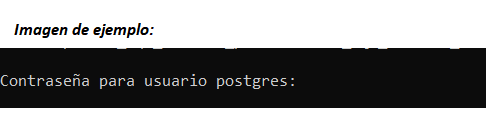

In [7]:
#Crear database en psql.
!psql -U $USERNAME -f "crea_db_prueba_sql.sql" 

#Luego de correr esta celda porfavor dirigirse al cmd y colocar la contraseña, en este caso es 'Barbara.95'

DROP DATABASE
CREATE DATABASE


In [8]:
#Observamos la existencia de los archivos que hay en la carpeta
!ls *.csv

test_cupid.csv
train_cupid.csv


In [9]:
#Importamos las bases de datos
test_cupid = pd.read_csv('test_cupid.csv')
train_cupid = pd.read_csv('train_cupid.csv')

In [10]:
#Comparamos las columnas de ambos DataFrame
fn.compara_columns_df (train_cupid,test_cupid)

Campos que difieren entre DataFrame de entrenamiento y DataFrame de testeo: 
 set()

Campos que difieren entre DataFrame de testeo y DataFrame de entrenamiento: 
 set()


<span style="color:brown">*No se observan diferencias entre ambos archivos.*

In [11]:
#Contamos las filas y las columnas de ambos DataFrame
fn.contador_filas_columns(train_cupid,test_cupid)

La cantidad de registros en df de entrenamiento:
 filas, columnas: (20081, 98)
La cantidad de registros en df de testeo:
 filas, columnas: (19943, 98)


<span style="color:brown"> *Se observan las mismas cantidad de columnas entre ambos archivos, pero una diferencia de 138 filas.*

In [12]:
#Revisamos los tipos de información de 
train_cupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20081 entries, 0 to 20080
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             20081 non-null  int64  
 1   height                          20081 non-null  float64
 2   virgo                           20081 non-null  int64  
 3   taurus                          20081 non-null  int64  
 4   scorpio                         20081 non-null  int64  
 5   pisces                          20081 non-null  int64  
 6   libra                           20081 non-null  int64  
 7   leo                             20081 non-null  int64  
 8   gemini                          20081 non-null  int64  
 9   aries                           20081 non-null  int64  
 10  aquarius                        20081 non-null  int64  
 11  cancer                          20081 non-null  int64  
 12  sagittarius                     

In [13]:
#Revisamos los tipos de información de los DataFrame
test_cupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19943 entries, 0 to 19942
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             19943 non-null  int64  
 1   height                          19943 non-null  float64
 2   virgo                           19943 non-null  int64  
 3   taurus                          19943 non-null  int64  
 4   scorpio                         19943 non-null  int64  
 5   pisces                          19943 non-null  int64  
 6   libra                           19943 non-null  int64  
 7   leo                             19943 non-null  int64  
 8   gemini                          19943 non-null  int64  
 9   aries                           19943 non-null  int64  
 10  aquarius                        19943 non-null  int64  
 11  cancer                          19943 non-null  int64  
 12  sagittarius                     

* <span style="color:brown">Para ambos DataFrame se observa que las columnas 'height', 'pro_dogs' y 'pro_cats' poseen números flotantes.
* <span style="color:brown">En ambos DataFrame no se observan datos nulos.

In [14]:
# Creamos una lista con todos los nombres de las variables
#variables 
lista_nombre_columnas = []
for n, i in enumerate(test_cupid):
    if test_cupid[i].dtypes =="float64":
        lista_nombre_columnas.append(i)
        
    elif test_cupid[i].dtypes =="int64":
        lista_nombre_columnas.append(i)

* <span style="color:brown">Decidimos crear una lista con la información de las columnas del DataFrame, con el fin de ocuparlos a futuro como el nombre del DataFrame que crearemos con psql.

In [15]:
lista_nombre_columnas

['age',
 'height',
 'virgo',
 'taurus',
 'scorpio',
 'pisces',
 'libra',
 'leo',
 'gemini',
 'aries',
 'aquarius',
 'cancer',
 'sagittarius',
 'asian',
 'hispanic / latin',
 'black',
 'indian',
 'pacific islander',
 'native american',
 'middle eastern',
 'colorado',
 'new york',
 'oregon',
 'arizona',
 'hawaii',
 'montana',
 'wisconsin',
 'virginia',
 'spain',
 'nevada',
 'illinois',
 'vietnam',
 'ireland',
 'louisiana',
 'michigan',
 'texas',
 'united kingdom',
 'massachusetts',
 'north carolina',
 'idaho',
 'mississippi',
 'new jersey',
 'florida',
 'minnesota',
 'georgia',
 'utah',
 'washington',
 'west virginia',
 'connecticut',
 'tennessee',
 'rhode island',
 'district of columbia',
 'canada',
 'missouri',
 'germany',
 'pennsylvania',
 'netherlands',
 'switzerland',
 'mexico',
 'ohio',
 'agnosticism',
 'atheism',
 'catholicism',
 'buddhism',
 'judaism',
 'hinduism',
 'islam',
 'pro_dogs',
 'pro_cats',
 'spanish',
 'chinese',
 'french',
 'german',
 'single',
 'seeing_someone',
 'av

* <span style="color:brown">Nos percatamos que hay nombres con espacios vacios, para eliminar dicho problema cambiaremos los caracteres especiales por espacios vacios y luego cambiaremos los espacios vacios por un guión bajo

In [16]:
#Recodificar espacios y slash
lista_nombre_columnas = list(map(lambda x: x.replace(' / ', ' '), lista_nombre_columnas))
lista_nombre_columnas = list(map(lambda x: x.replace(' ', '_'), lista_nombre_columnas))

In [17]:
#Observamos los cambios realizados en la lista creada
lista_nombre_columnas

['age',
 'height',
 'virgo',
 'taurus',
 'scorpio',
 'pisces',
 'libra',
 'leo',
 'gemini',
 'aries',
 'aquarius',
 'cancer',
 'sagittarius',
 'asian',
 'hispanic_latin',
 'black',
 'indian',
 'pacific_islander',
 'native_american',
 'middle_eastern',
 'colorado',
 'new_york',
 'oregon',
 'arizona',
 'hawaii',
 'montana',
 'wisconsin',
 'virginia',
 'spain',
 'nevada',
 'illinois',
 'vietnam',
 'ireland',
 'louisiana',
 'michigan',
 'texas',
 'united_kingdom',
 'massachusetts',
 'north_carolina',
 'idaho',
 'mississippi',
 'new_jersey',
 'florida',
 'minnesota',
 'georgia',
 'utah',
 'washington',
 'west_virginia',
 'connecticut',
 'tennessee',
 'rhode_island',
 'district_of_columbia',
 'canada',
 'missouri',
 'germany',
 'pennsylvania',
 'netherlands',
 'switzerland',
 'mexico',
 'ohio',
 'agnosticism',
 'atheism',
 'catholicism',
 'buddhism',
 'judaism',
 'hinduism',
 'islam',
 'pro_dogs',
 'pro_cats',
 'spanish',
 'chinese',
 'french',
 'german',
 'single',
 'seeing_someone',
 'avai

In [18]:
#Averiguamos el largo de nuestra lista creada
print(f"El total de numero de elementos de la lista es:{len(lista_nombre_columnas)}")

El total de numero de elementos de la lista es:98


* <span style="color:brown">El total de los elementos en la lista es de 98, lo que significa que existirán 98 columnas en total en nuestros futuros DataFrame.

In [19]:
#Creamos el codigo para la futura tabla con sql indicando el nombre de la columna y el tipo de dato
create_table= "create table "

tabla_query= "("
for index, column in enumerate (lista_nombre_columnas, start=1):
    if column =='height' or column=='pro_cats' or column=='pro_dogs':
        tabla_query += f"{column} float"
    else:
        tabla_query += f"{column} int"
    if index <98:
        tabla_query+=","

tabla_query += ");"

In [20]:
#Observamos los cambios realizados
tabla_query

'(age int,height float,virgo int,taurus int,scorpio int,pisces int,libra int,leo int,gemini int,aries int,aquarius int,cancer int,sagittarius int,asian int,hispanic_latin int,black int,indian int,pacific_islander int,native_american int,middle_eastern int,colorado int,new_york int,oregon int,arizona int,hawaii int,montana int,wisconsin int,virginia int,spain int,nevada int,illinois int,vietnam int,ireland int,louisiana int,michigan int,texas int,united_kingdom int,massachusetts int,north_carolina int,idaho int,mississippi int,new_jersey int,florida int,minnesota int,georgia int,utah int,washington int,west_virginia int,connecticut int,tennessee int,rhode_island int,district_of_columbia int,canada int,missouri int,germany int,pennsylvania int,netherlands int,switzerland int,mexico int,ohio int,agnosticism int,atheism int,catholicism int,buddhism int,judaism int,hinduism int,islam int,pro_dogs float,pro_cats float,spanish int,chinese int,french int,german int,single int,seeing_someone in

In [21]:
#llamamos al cursor y conector
conector, cursor = conector_y_cursor()

In [22]:
#Creamos las tablas en nuestro sql
for tabla in ['train_cupid', 'test_cupid']:
    #Eliminamos la tabla en caso de que exista
    query1= f"drop table if exists {tabla};"
    cursor.execute(query1)
    conector.commit()
    
    #Creamos la query con los nombres de la lista y sus tipo de datos
    query1 = create_table +tabla+tabla_query
    cursor.execute(query1)
conector.commit()

In [23]:
#Creamos una función 'colocar_info_tabla':

def colocar_info_tabla(nombre_tabla):
    """
    Permite colocar información en tablas 
        Parametros:
            nombre_tabla: Nombre de tabla a crear con psql, desde un csv existenta.
        
        Retorno:
            Retorna tabla con información obtenida desde un csv
    """
    with open ('./'+nombre_tabla+'.csv', 'r') as file:
        #Realizamos la entrada de datos
        reader = csv.reader(file)
        #Ignorar la primera fila, debido a que contiene los nombres de las columnas, anteriormente ya habiamos guardado los nombres.
        next(reader)

        #Agregamos la información a las otras filas (%s = texto)
        for row in reader:
            info_tabla = "INSERT INTO "+nombre_tabla+" VALUES ("
            info_tabla += "%s,"*97
            info_tabla += "%s"
            info_tabla += ")"

            cursor.execute(info_tabla, row)

        conector.commit()

In [24]:
#Colocamos información a la tabla 'test_cupid'
colocar_info_tabla('test_cupid')

In [25]:
#Colocamos información a la tabla 'train_cupid'
colocar_info_tabla('train_cupid')

In [26]:
#Averiguamos el total de datos colocados en cada tabla:

#Revisamos el total de tablas existentes
cursor.execute("SELECT table_name, table_schema FROM information_schema.tables WHERE table_schema = 'public' ORDER BY table_name;")
n_tablas = cursor.fetchall()
print(f"Los numeros de tablas existentes son: {len(n_tablas)}\n")

#Averiguamos la cantidad de filas corresponfiente en cada tabla
for tabla in ['train_cupid', 'test_cupid']:
    print(f"Nombre de tabla: {tabla}")
    query = f"select * from {tabla}"
    cursor.execute(query)
    print(f"Cantidad de filas: {cursor.rowcount}\n")

Los numeros de tablas existentes son: 2

Nombre de tabla: train_cupid
Cantidad de filas: 20081

Nombre de tabla: test_cupid
Cantidad de filas: 19943



* <span style="color:brown"> Observamos que la cantidad de filas en cada tabla creada corresponde a la cantidad de filas en el primer DataFrame creado.

In [27]:
#Cerramos sesión por seguridad
conector.close()

_______

## <font color='dimgray'>Parte 2: Entrenamiento de modelos (3.5 Puntos) </font>

* Ingestar la tabla de training **mediante** <span style='background:gainsboro'><font color='dimgray'>psycopg2</font></span> para el posterior entrenamiento del modelo.
* Entrenar los siguientes modelos (sin necesidad de ajustar por hiper parámetros):
    * <span style='background:gainsboro'><font color='dimgray'>GradientBoostingClassifier</font></span>, <span style='background:gainsboro'><font color='dimgray'>AdaBoostClassifer</font></span>, <span style='background:gainsboro'><font color='dimgray'>RandomForestClassifier</font></span>, <span style='background:gainsboro'><font color='dimgray'>SVC</font></span>, <span style='background:gainsboro'><font color='dimgray'>DecisionTreeClassifier</font></span>, <span style='background:gainsboro'><font color='dimgray'>LogisticRegression</font></span>, <span style='background:gainsboro'><font color='dimgray'>BernoulliNB</font></span>.
    * Existen tres vectores objetivos a evaluar: single, seeing someone y available.
* Serializar el objeto y preservarlo por cada combinación de modelo entrenado y vector objetivo

In [28]:
#Iniciamos seción con psycopg2
#llamamos al cursor y conector
conector, cursor = conector_y_cursor()

In [29]:
# generamos la consulta en el cursor sobre la tabla train_cupid
cursor.execute("SELECT * FROM train_cupid;")
tabla_train = cursor.fetchall()

# Posteriormente transformamos la consulta en una lista antes de ingresarla como un pd.DataFrame
df_train = pd.DataFrame(list(tabla_train))

#Agregamos el nombre de las columnas
df_train.columns = lista_nombre_columnas

In [30]:
#Cerramos sesión por seguridad
conector.close()

In [31]:
#Observamos los cambios realizados
df_train.head(2)

,age,height,virgo,taurus,scorpio,pisces,libra,leo,gemini,aries,...,orientation_straight,sex_m,smokes_sometimes,smokes_trying_to_quit,smokes_when_drinking,smokes_yes,body_type_overweight,body_type_regular,education_high_school,education_undergrad_university
0,35,70.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,38,68.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0


In [32]:
#Revisamos la información de la tabla creada
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20081 entries, 0 to 20080
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             20081 non-null  int64  
 1   height                          20081 non-null  float64
 2   virgo                           20081 non-null  int64  
 3   taurus                          20081 non-null  int64  
 4   scorpio                         20081 non-null  int64  
 5   pisces                          20081 non-null  int64  
 6   libra                           20081 non-null  int64  
 7   leo                             20081 non-null  int64  
 8   gemini                          20081 non-null  int64  
 9   aries                           20081 non-null  int64  
 10  aquarius                        20081 non-null  int64  
 11  cancer                          20081 non-null  int64  
 12  sagittarius                     

* <span style="color:brown"> Se observa que los datos tanto como el nombre, el tipo de dato y el número de datos se colocaron adecuadamente.

<AxesSubplot:>

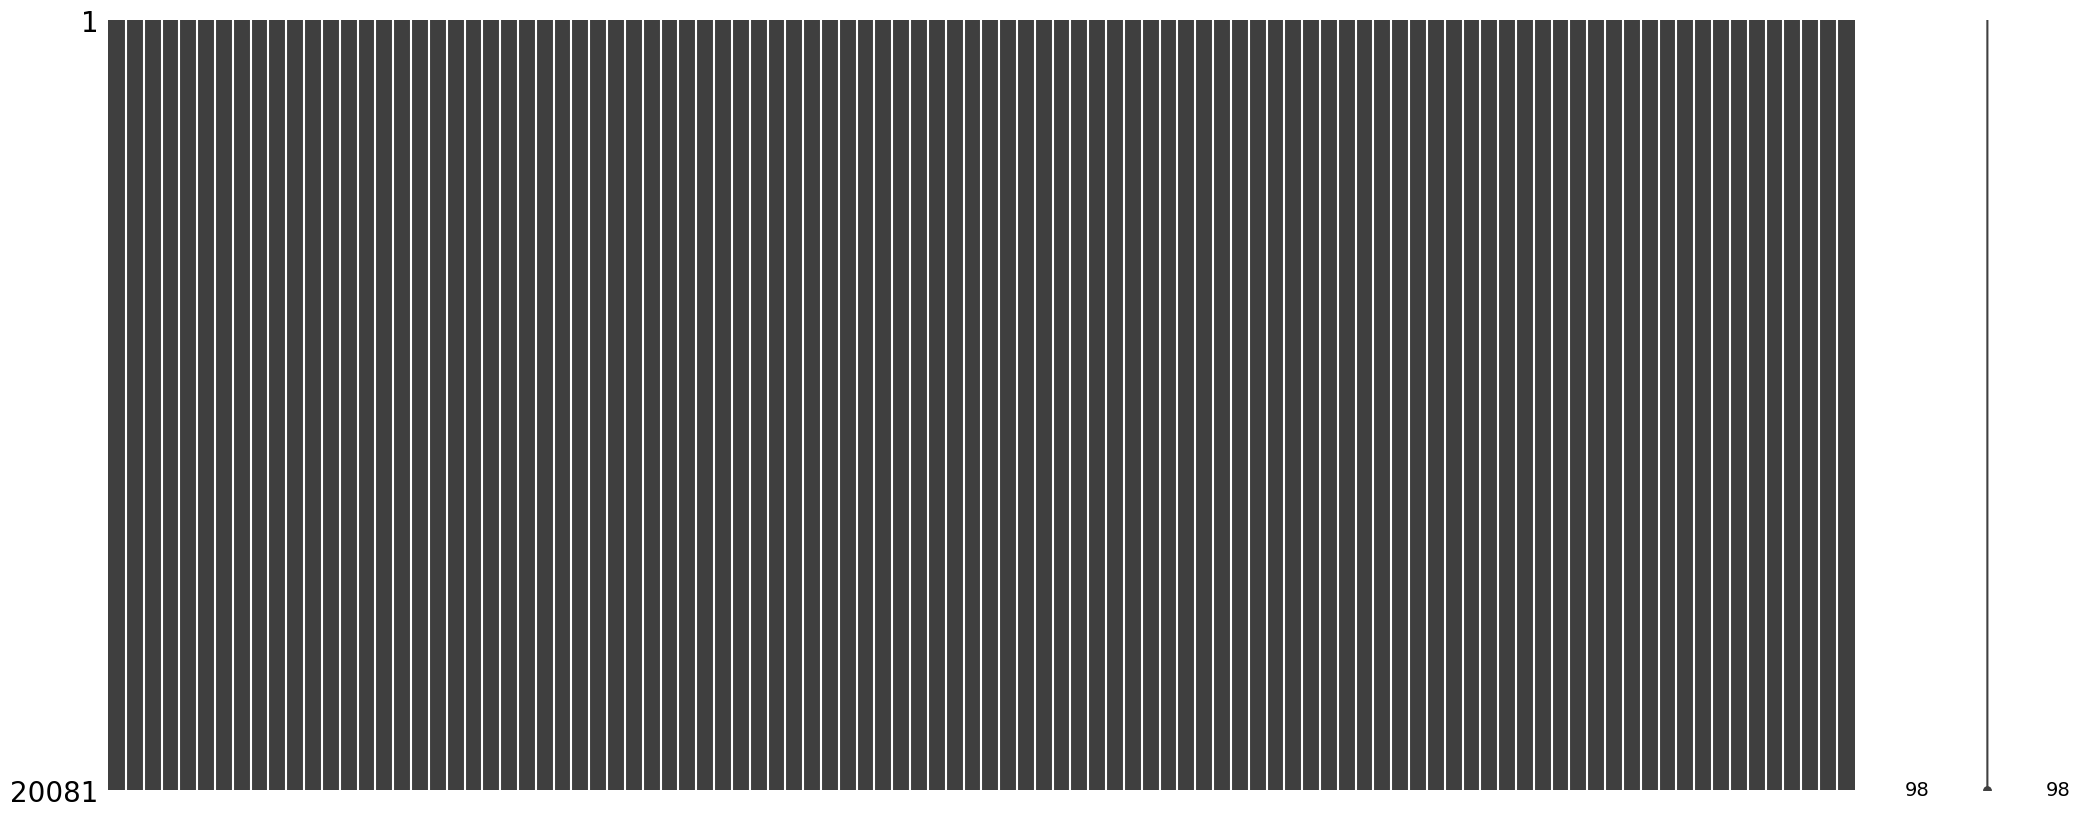

In [33]:
#Revisamos que no existan datos nulos
missingno.matrix(df_train)

* <span style="color:brown"> No se observan datos nulos.

* ### Existen tres vectores objetivos a evaluar: <span style='background:gainsboro'><font color='dimgray'>single</font></span>, <span style='background:gainsboro'><font color='dimgray'>seeing_someone</font></span> y <span style='background:gainsboro'><font color='dimgray'>available</font></span>.

In [34]:
#Creamos una lista con los vectores objetivos señalados.
vectores_objetivos = ['single', 'seeing_someone', 'available']

* ### Entrenar los siguientes modelos (sin necesidad de ajustar por hiper parámetros):
    * <span style='background:gainsboro'><font color='dimgray'>GradientBoostingClassifier</font></span>, <span style='background:gainsboro'><font color='dimgray'>AdaBoostClassifer</font></span>, <span style='background:gainsboro'><font color='dimgray'>RandomForestClassifier</font></span>, <span style='background:gainsboro'><font color='dimgray'>SVC</font></span>, <span style='background:gainsboro'><font color='dimgray'>DecisionTreeClassifier</font></span>, <span style='background:gainsboro'><font color='dimgray'>LogisticRegression</font></span>, <span style='background:gainsboro'><font color='dimgray'>BernoulliNB</font></span>.

In [35]:
#Creamos un diccionario con los modelos
modelos = {
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'BernoulliNB': BernoulliNB()
}

* ### Serializar el objeto y preservarlo por cada combinación de modelo entrenado y vector objetivo

In [36]:
#Creamos el X_train
X_train= df_train.drop(columns = vectores_objetivos, axis=1)

#### <span style="color:red">EN CASO DE EXISTIR ARCHIVOS '.plk' CREADOS CON ANTERIORIDAD, POR FAVOR descomentar el siguiente chang, si no continue con con los demás

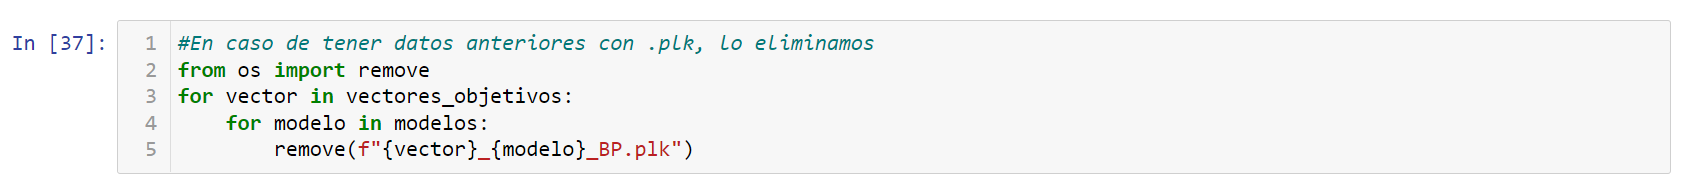

In [37]:
# #En caso de tener datos anteriores con .plk, lo eliminamos
# from os import remove
# for vector in vectores_objetivos:
#     for modelo in modelos:
#         remove(f"{vector}_{modelo}_BP.plk")

In [38]:
#Recorremos los vectores objetivos con los modelos y guardamos
for vector in vectores_objetivos:
    
    #Recorremos los modelos del diccionario
    for modelo in modelos:
        modelo_temporal = modelos[modelo].fit(X_train, df_train[vector])
        
        #Serealizamos, guardamos por separado cada modelo y guardamos con iniciales (BP de Bárbara Pérez)
        nombre_archivo = f"{vector}_{modelo}_BP.plk"
        pickle.dump(modelo_temporal, open (nombre_archivo,'wb'))

In [39]:
#Revisamos los archivos
!ls *.plk

available_AdaBoostClassifier_BP.plk
available_BernoulliNB_BP.plk
available_DecisionTreeClassifier_BP.plk
available_GradientBoostingClassifier_BP.plk
available_LogisticRegression_BP.plk
available_RandomForestClassifier_BP.plk
available_SVC_BP.plk
seeing_someone_AdaBoostClassifier_BP.plk
seeing_someone_BernoulliNB_BP.plk
seeing_someone_DecisionTreeClassifier_BP.plk
seeing_someone_GradientBoostingClassifier_BP.plk
seeing_someone_LogisticRegression_BP.plk
seeing_someone_RandomForestClassifier_BP.plk
seeing_someone_SVC_BP.plk
single_AdaBoostClassifier_BP.plk
single_BernoulliNB_BP.plk
single_DecisionTreeClassifier_BP.plk
single_GradientBoostingClassifier_BP.plk
single_LogisticRegression_BP.plk
single_RandomForestClassifier_BP.plk
single_SVC_BP.plk


* <span style="color:brown"> Se crearon los archivos solicitados

_____________________

## <font color='dimgray'>Parte 3: Exportación de predicciones (3.5 Puntos)</font>

* Ingestar la tabla de testing **mediante** <span style='background:gainsboro'><font color='dimgray'>psycopg2</font></span> para la posterior predicción del modelo.
* **En base a los objetos serializados**, predecir y evaluar cuatro queries específicas:
    * **Query 1**: 'atheism', 'asian', 'employed', 'pro_dogs', 'chinese'.
    * **Query 2**: 'income_over_75', 'french', 'german','orientation_straight', 'new york'.
    * **Query 3**: 'education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed'.
    * **Query 4**: 'taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism'.
* Cada una de estas queries específicas debe ser registrada en la base de datos.
* La base de datos creada debe contener las tablas:
    * 2 que representan a training y testing.
    * 84 que representan a cada una de las combinaciones entre modelo, vector y query específica.
* A modo de referencia, la base de datos creada debe contener 86 tablas en total.
 


_______

* ### *Ingestar la tabla de testing **mediante** <span style='background:gainsboro'><font color='dimgray'>psycopg2</font></span> para la posterior predicción del modelo.*


In [40]:
#Iniciamos seción con psycopg2
#llamamos al cursor y conector
conector, cursor = conector_y_cursor()

In [41]:
# generamos la consulta en el cursor sobre la tabla test_cupid
cursor.execute("SELECT * FROM test_cupid;")
tabla_test = cursor.fetchall()

# Posteriormente transformamos la consulta en una lista antes de ingresarla como un pd.DataFrame
df_test = pd.DataFrame(list(tabla_test))

#Agregamos el nombre de las columnas
df_test.columns = lista_nombre_columnas

In [42]:
#Cerramos sesión
conector.close()

In [43]:
#Observamos los cambios realizados
df_train.head(2)

,age,height,virgo,taurus,scorpio,pisces,libra,leo,gemini,aries,...,orientation_straight,sex_m,smokes_sometimes,smokes_trying_to_quit,smokes_when_drinking,smokes_yes,body_type_overweight,body_type_regular,education_high_school,education_undergrad_university
0,35,70.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,38,68.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0


* <span style="color:brown"> Se observa que se realizó bien la carga de datos para el DataFrame creado

In [44]:
#Observamos la información del DataFrame creado
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20081 entries, 0 to 20080
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             20081 non-null  int64  
 1   height                          20081 non-null  float64
 2   virgo                           20081 non-null  int64  
 3   taurus                          20081 non-null  int64  
 4   scorpio                         20081 non-null  int64  
 5   pisces                          20081 non-null  int64  
 6   libra                           20081 non-null  int64  
 7   leo                             20081 non-null  int64  
 8   gemini                          20081 non-null  int64  
 9   aries                           20081 non-null  int64  
 10  aquarius                        20081 non-null  int64  
 11  cancer                          20081 non-null  int64  
 12  sagittarius                     

* <span style="color:brown"> Se observa que los datos tanto como el nombre, el tipo de dato y el número de datos se colocaron adecuadamente.

<AxesSubplot:>

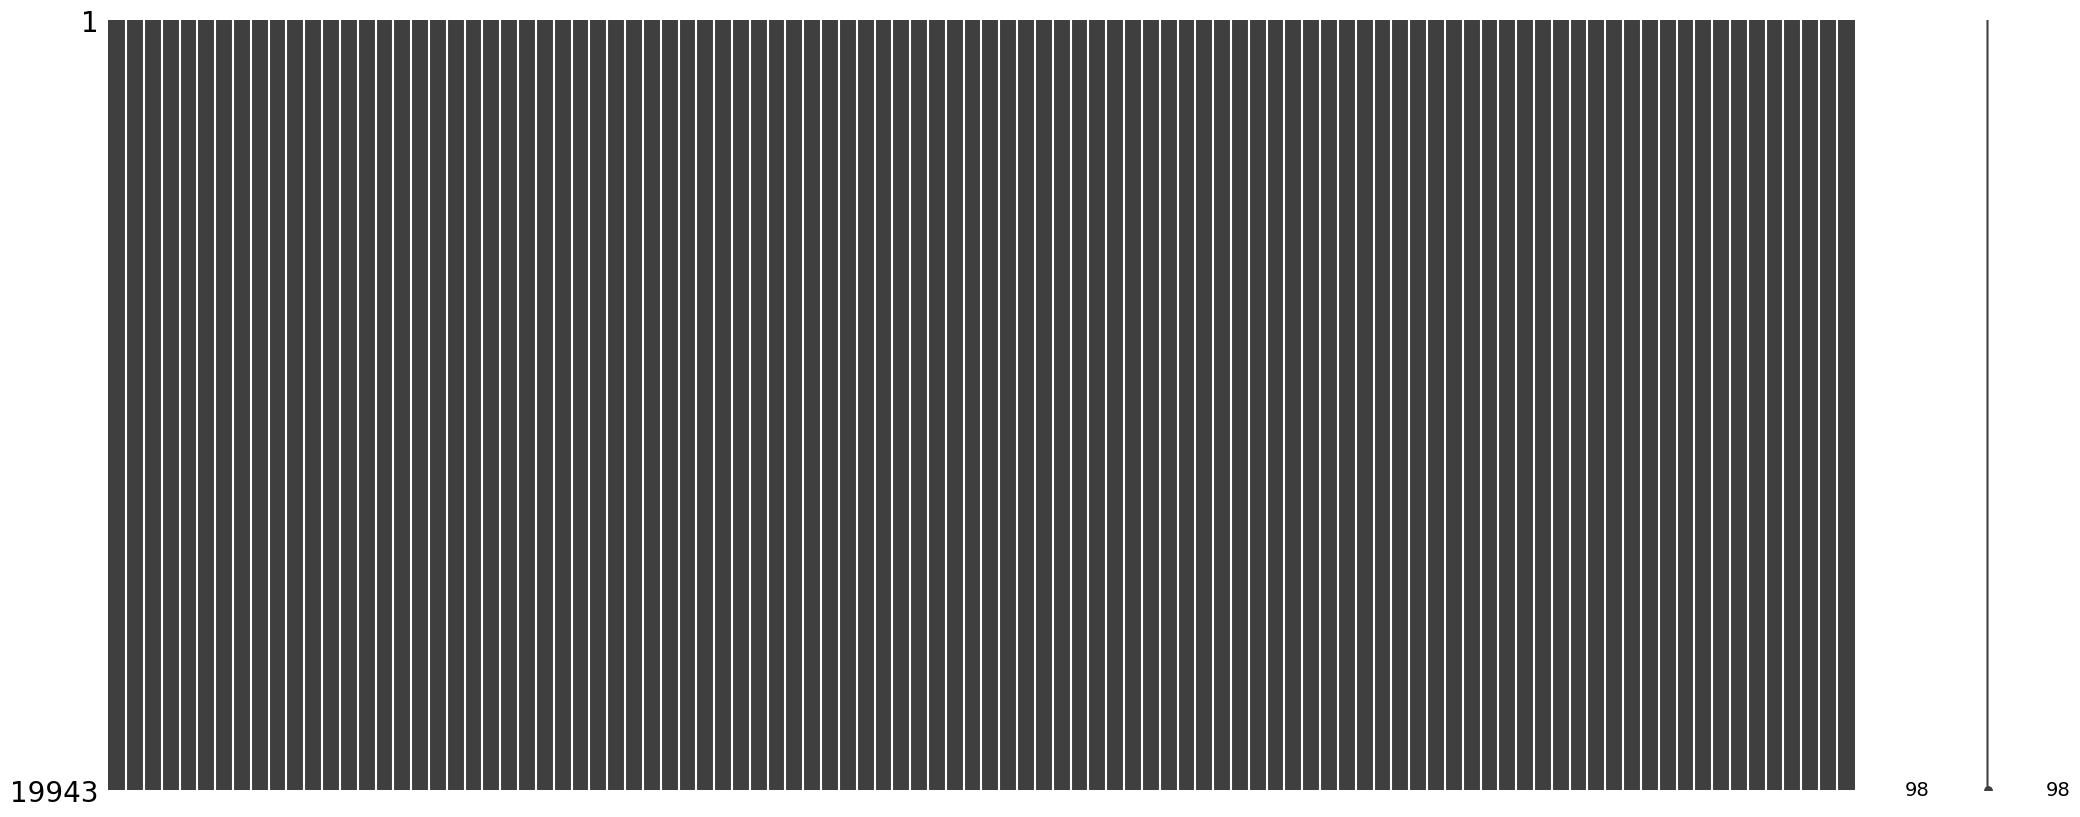

In [45]:
#Revisamos que no existan datos nulos
missingno.matrix(df_test)

* <span style="color:brown"> No se observan datos nulos.

* ### **En base a los objetos serializados**, predecir y evaluar cuatro queries específicas:
    * Cada una de estas queries específicas debe ser registrada en la base de datos.


In [46]:
#Creamos las querys solicitadas en un diccionario

queries={
    'query_1': ['atheism', 'asian', 'employed', 'pro_dogs', 'chinese'],
    'query_2': ['income_over_75', 'french', 'german','orientation_straight', 'new_york'],
    'query_3': ['education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed'],
    'query_4': ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism']
    
}

In [47]:
#Creamos el X_train
X_test= df_test.drop(columns = vectores_objetivos, axis=1)

In [48]:
# from sqlalchemy import create_engine
from sqlalchemy import create_engine

engine = create_engine(f"postgresql://{USERNAME}:{PASSWORD}@{HOST}/{DATABASE}", echo=False)

In [49]:
#Recorremos los vectores objetivos con los modelos y guardamos
for vector in vectores_objetivos:
    
    #Recorremos los modelos del diccionario y abrimos los archivos creados
    for modelo in modelos:
        modelo_temporal = pickle.load(open(f"{vector}_{modelo}_BP.plk","rb"))
        
        #Recorremos el diccionario con las queries solicitadas
        for query in queries:
        
            df_temporal = helpers.create_crosstab(f"{vector}_{modelo}_BP.plk", X_test, df_test[vector], queries[query])
            
            #Serealizamos, guardamos por separado cada modelo y guardamos con iniciales (BP de Bárbara Pérez)
            nombre_tabla = f"{query}_{vector}_{modelo}_BP"
            
##             pickle.dump(modelo_temporal, open (nombre_archivo,'wb'))
            df_temporal.to_sql(nombre_tabla, con=engine, schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None, method=None)

In [50]:
# #Iniciamos seción con psycopg2
# #llamamos al cursor y conector
conector, cursor = conector_y_cursor()


In [51]:
cursor.execute("SELECT table_name, table_schema FROM information_schema.tables WHERE table_schema = 'public' ORDER BY table_name;")
n_tablas = cursor.fetchall()
print(f"Los numeros de tablas existentes son: {len(n_tablas)}")


Los numeros de tablas existentes son: 86


* <span style="color:brown"> Se realizan 86 tablas, tal como se solicita en las instrucciones.

* <span style="color:brown"> Con los *'for'* realizados iteramos 3 veces para realizar las combinaciones solicitadas.

In [52]:
#Cerramos sesión
conector.close()

* #### Un archivo pgsql donde exportará la **base de datos** creada en el punto 1. Para generar el archivo, pueden implementar la siguiente línea **desde la consola**:

<span style='background:gainsboro'><font color='dimgray'>pg_dump -U nombre_usuario nombre_tabla > apellido_nombre_sql_test.pgsql</font></span>

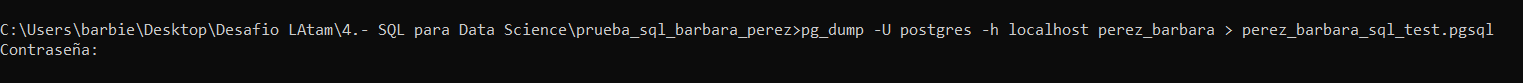

___________________

______________

________________________